# SQLAlchemy Homework - Surfs Up! (Solved)

### Before You Begin

1. Create a new repository for this project called `sqlalchemy-challenge`. **Do not add this homework to an existing repository**.

2. Clone the new repository to your computer.

3. Add your Jupyter notebook and `app.py` to this folder. These will be the main scripts to run for analysis.

4. Push the above changes to GitHub or GitLab.

![surfs-up.png](Images/surfs-up.png)

Congratulations! You've decided to treat yourself to a long holiday vacation in Honolulu, Hawaii! To help with your trip planning, you need to do some climate analysis on the area. The following outlines what you need to do.

## Step 1 - Climate Analysis and Exploration

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Use the provided [starter notebook](climate_starter.ipynb) and [hawaii.sqlite](Resources/hawaii.sqlite) files to complete your climate analysis and data exploration.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.



- - -

## Step 2 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

* Use Flask to create your routes.

### Routes

* `/`

  * Home page.

  * List all routes that are available.

* `/api/v1.0/precipitation`

  * Convert the query results to a dictionary using `date` as the key and `prcp` as the value.

  * Return the JSON representation of your dictionary.

* `/api/v1.0/stations`

  * Return a JSON list of stations from the dataset.

* `/api/v1.0/tobs`
  * Query the dates and temperature observations of the most active station for the last year of data.
  
  * Return a JSON list of temperature observations (TOBS) for the previous year.

* `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`

  * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

  * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.

  * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.

## Hints

* You will need to join the station and measurement tables for some of the queries.

* Use Flask `jsonify` to convert your API data into a valid JSON response object.

- - -


### Copyright

Trilogy Education Services © 2020. All Rights Reserved.


In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [7]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Display the column names of measurement
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [10]:
# Display the column names of measurement
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Use `engine.execute` to select and display the first 10 rows from the station table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [16]:
# Calculate the date 1 year ago from the last data point in the database

last_date_in_database_str = session.query(func.max(Measurement.date)).first()

print(f'Last date in the database is : {last_date_in_database_str[0]}')

# Convert to python date time object using pandas
last_date_in_database_pd = pd.to_datetime(last_date_in_database_str[0]).to_pydatetime()

# Calculate the which is one year ago from the last data point in the database
# Year 2017 is not a leap year
one_yr_ago_pd = last_date_in_database_pd - dt.timedelta(days=365)

print(f'One year ago date from the last date in the database is (in python datetime format): {one_yr_ago_pd}')

# Convert to python string object using pandas
one_yr_ago_str = pd.to_datetime(one_yr_ago_pd).strftime('%Y-%m-%d')

print(f'One year ago date from the last date in the database is (in string format): {one_yr_ago_str}')

Last date in the database is : 2017-08-23
One year ago date from the last date in the database is (in python datetime format): 2016-08-23 00:00:00
One year ago date from the last date in the database is (in string format): 2016-08-23


In [17]:
# Create a pandas dataframe containing "date" and "prcp" values from the "measurement" table

# Perform a query to retrieve the date and precipitation scores
climate_db = session.query(Measurement.date, Measurement.prcp).all()

# Save the query results as a Pandas DataFrame
climate_df = pd.DataFrame( climate_db )

# Clean the climate data frame by removing NaN values
climate_df = climate_df.dropna(how='any')

# Sort the dataframe by date
climate_df = climate_df.sort_values(by='date')

# Set Index
climate_df.set_index(["date"], inplace=True)

# Display to output
climate_df.head()

,prcp
date,
2010-01-01,0.08
2010-01-01,0.15
2010-01-01,0.28
2010-01-01,0.05
2010-01-01,0.14


In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_months_climate_db = session.query(Measurement.date, Measurement.prcp). \
                                    filter(Measurement.date >= one_yr_ago_str).all()

# Save the query results as a Pandas DataFrame
last_12_months_climate_df = pd.DataFrame( last_12_months_climate_db )

# Clean the climate data frame by removing NaN values
last_12_months_climate_df = last_12_months_climate_df.dropna(how='any')

# Sort the dataframe by date
last_12_months_climate_df = last_12_months_climate_df.sort_values(by='date')

# Set Index
last_12_months_climate_df.set_index(["date"], inplace=True)

# Display to output
last_12_months_climate_df.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


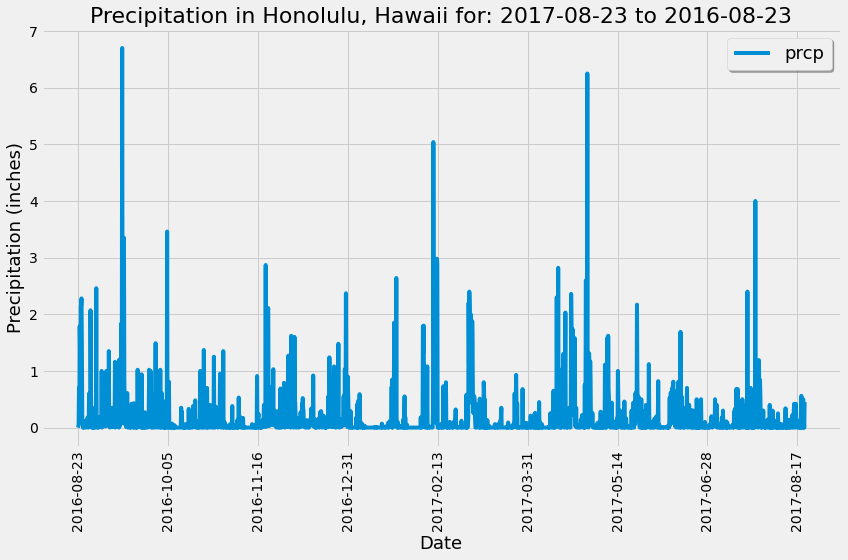

In [19]:
# Use Pandas Plotting with Matplotlib to plot the last one year data

last_12_months_climate_df.plot(y='prcp', use_index=True, figsize = (12,8), rot = 90)

plt.grid(True)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Precipitation (inches)", fontsize = 18)

title_str = f"Precipitation in Honolulu, Hawaii for: {last_date_in_database_str[0]} to {one_yr_ago_str}"
plt.title(title_str, fontsize = 22)

legend = plt.legend(loc="best", shadow=True, fontsize=18,  fancybox=True)

plt.tight_layout()

plt.savefig("Images/Last12MonthsPrecipitationChart.png", bbox_inches='tight')
plt.show()

In [20]:
# Please compare above output chart with below chart to validate the solution

In [21]:
# Please compare above output chart with below chart to validate the solution


### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

  ![precipitation](Images/precipitation.png)

* Use Pandas to print the summary statistics for the precipitation data.


In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12_months_climate_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Design a query to show how many stations are available in this dataset?
number_of_stations_db = session.query(Station).distinct(Station.station).count()

print(f'Number of distinct stations avaiable in this dataset: {number_of_stations_db}')



Number of distinct stations avaiable in this dataset: 9


In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_stations_db = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()

#print(f'Most active stations are: {most_active_stations_db}')

most_active_stations_db

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Most active station

most_active_station_id = most_active_stations_db[0][0]
print(most_active_station_id)

most_active_station_name = session.query(Station.name).filter_by(station = most_active_station_id)

for stations in most_active_station_name:
    print(f'The Most active station is: {stations[0]}')

# most_active_station_name = most_active_station[0][0]
print(f'The Most active station name is: {most_active_station_name[0][0]}')

USC00519281
The Most active station is: WAIHEE 837.5, HI US
The Most active station name is: WAIHEE 837.5, HI US


In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

most_active_station_temperate_db = session.query(Measurement.station, func.min(Measurement.tobs),
                                                          func.max(Measurement.tobs),
                                                          func.avg(Measurement.tobs)).\
                                           filter(Measurement.station == most_active_station_id).all()

most_active_station_lowest_temperate  = most_active_station_temperate_db[0][1]

most_active_station_highest_temperate = most_active_station_temperate_db[0][2]

most_active_station_average_temperate = most_active_station_temperate_db[0][3]

print(f'The Most active station ID is: {most_active_station_id}')
print(f'The Most active station name is: {most_active_station_name[0][0]}')
print(f'The Most active station lowest temperate recorded is: {most_active_station_lowest_temperate}')
print(f'The Most active station highest temperate recorded is: {most_active_station_highest_temperate}')
print(f'The Most active station average temperate recorded is: {most_active_station_average_temperate}')

#print(most_active_station_temperate_db)

#(54.0, 85.0, 71.66378066378067)

The Most active station ID is: USC00519281
The Most active station name is: WAIHEE 837.5, HI US
The Most active station lowest temperate recorded is: 54.0
The Most active station highest temperate recorded is: 85.0
The Most active station average temperate recorded is: 71.66378066378067


In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_12_months_of_temperature_db = \
            session.query(Measurement.tobs).\
               filter(Measurement.station == most_active_station_id).\
               filter(Measurement.station == Station.station).\
               filter(Measurement.date >= one_yr_ago_str).filter(Measurement.date <= last_date_in_database_str[0]).all()

most_active_station_12_months_of_temperature_df = pd.DataFrame(most_active_station_12_months_of_temperature_db)

most_active_station_12_months_of_temperature_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


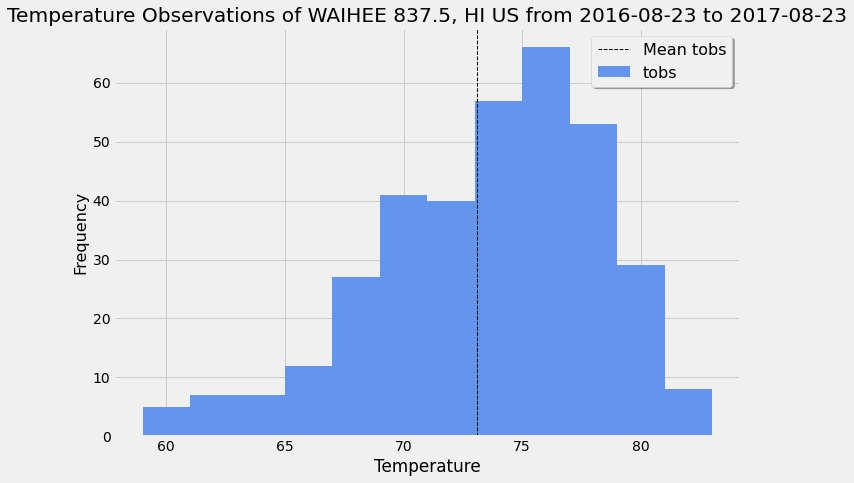

In [28]:
title_str = f"Temperature Observations of {most_active_station_name[0][0]} from {one_yr_ago_str} to {last_date_in_database_str[0]}"

most_active_station_12_months_of_temperature_hist_chart_pandas = \
                        most_active_station_12_months_of_temperature_df["tobs"].plot(
                        kind   = 'hist',
                        bins   = 12,
                        title  = title_str,
                        color  = "cornflowerblue",
                        legend = True,
                        figsize=(10,7))

# plot axis vertical line
plt.axvline(most_active_station_12_months_of_temperature_df["tobs"].mean(),
            color='k', linestyle='dashed', linewidth=1, label="Temperature Mean")

# Assing x-label and y-label

most_active_station_12_months_of_temperature_hist_chart_pandas.set_xlabel("Temperature")
most_active_station_12_months_of_temperature_hist_chart_pandas.set_ylabel("Frequency", fontsize = 16)

# Provide legend name
column_name = ["Mean tobs","tobs"]
legend = plt.legend(column_name, loc="best", shadow=True, fontsize=16,  fancybox=True)
#plt.legend(column_name, loc = "best")

#plt.tight_layout()

# Save the figure
plt.savefig("Images/TemperatureObservation.png", bbox_inches='tight')

plt.show()


In [29]:
# Please compare above output with below to validate solution

### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?

  * Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (TOBS).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

    ![station-histogram](Images/station-histogram.png)

## Bonus: Other Recommended Analyses

* The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.


## Bonus Challenge Assignment

### Trip Temperature Analysis

* The starter notebook contains a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d`. The function will return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (TMAX-TMIN) value as the y error bar (YERR).

    ![temperature](Images/temperature.png)

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#set trip dates and previous dates
trip = '2018-03-01 to 2018-03-12'

trip_start_date = '2018-03-01'
trip_end_date = '2018-03-12'

trip_start_date_pd = pd.to_datetime(trip_start_date).to_pydatetime()
trip_end_date_pd = pd.to_datetime(trip_end_date).to_pydatetime()

#calculate the tmin, tavg, and tmax 


last_year_start_pd = trip_start_date_pd - dt.timedelta(days=365)
last_year_end_pd = trip_end_date_pd - dt.timedelta(days=365)

last_year_start_str = pd.to_datetime(last_year_start_pd).strftime('%Y-%m-%d')
last_year_end_str = pd.to_datetime(last_year_end_pd).strftime('%Y-%m-%d')

trip_temperatures = calc_temps(last_year_start_str, last_year_end_str)
print(trip_temperatures)


[(62.0, 70.98611111111111, 82.0)]


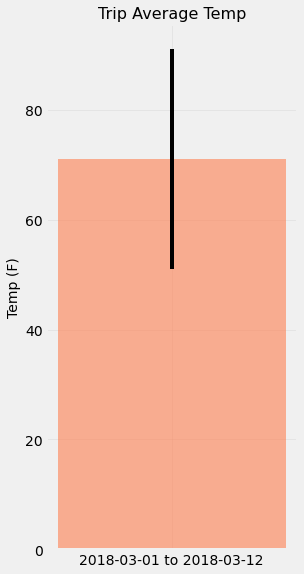

In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


# Load results from previous values into variables
trip_min_temp = trip_temperatures[0][0]
trip_avg_temp = trip_temperatures[0][1]
trip_max_temp = trip_temperatures[0][2]

# Plot bar chart
plt.figure(figsize=(4,9))
plt.bar(trip, trip_avg_temp, yerr=(trip_max_temp - trip_min_temp), color = 'coral', alpha = .6)

# Title 
plt.title('Trip Average Temp', fontsize = 16)
plt.ylabel('Temp (F)', fontsize = 14)
plt.grid(alpha=.3)

# Save figure file
plt.savefig("Images/TripAvgTemperature.png", bbox_inches='tight')
plt.show()



In [33]:
# Please validate the above output with below to validate the solution

### Daily Temperature Average

* Calculate the temperate per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.

* You are provided with a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic TOBS that match that date string.

* Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

* Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

* Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

  ![daily-normals](Images/daily-normals.png)

In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Station.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation]

rainfall_data_db = session.query(*sel).\
                 filter(Station.station == Measurement.station).\
                 filter(Measurement.date >= last_year_start_str).\
                 filter(Measurement.date <= last_year_end_str).\
                 group_by(Measurement.station).\
                 order_by(func.sum(Measurement.prcp).desc()).\
                 all()

rainfall_df = pd.DataFrame(rainfall_data_db,
                           columns= ['Station ID', 'Station Name', 'Total Rainfall', 'Latitude', 'Longitude', 'Elevation'])

#convert query object into data frame
rainfall_df.head()


,Station ID,Station Name,Total Rainfall,Latitude,Longitude,Elevation
0,USC00513117,"KANEOHE 838.1, HI US",5.76,21.42340,-157.80150,14.6
1,USC00519281,"WAIHEE 837.5, HI US",5.40,21.45167,-157.84889,32.9
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",3.50,21.33310,-157.80250,152.4
3,USC00517948,"PEARL CITY, HI US",2.98,21.39340,-157.97510,11.9
4,USC00519397,"WAIKIKI 717.2, HI US",2.74,21.27160,-157.81680,3.0


In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")


[(62.0, 69.15384615384616, 77.0)]

In [36]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
my_trip = '2018-03-01 to 2018-03-12'

my_start_date = '2018-03-01'
my_end_date = '2018-03-12'

date = pd.to_datetime(my_start_date).to_pydatetime()
end_date = pd.to_datetime(my_end_date).to_pydatetime()

# Use the start and end date to create a range of dates
delta = dt.timedelta(days=1)
date_range = []
while date <= end_date:
    date_range.append(date)
    date = date + delta

# print(dt.date(date_range))
trip_daily_normals = []

# Strip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
for dates in date_range:
    date_format= dates.strftime("%m-%d")
    daily_normal = daily_normals(date_format)
    trip_daily_normals.append(daily_normal)
    
trip_daily_normals


[[(64.0, 70.0327868852459, 76.0)],
 [(61.0, 70.36666666666666, 78.0)],
 [(60.0, 70.06896551724138, 78.0)],
 [(57.0, 69.27272727272727, 77.0)],
 [(60.0, 67.89090909090909, 76.0)],
 [(60.0, 69.20338983050847, 76.0)],
 [(60.0, 69.17241379310344, 78.0)],
 [(59.0, 68.72413793103448, 78.0)],
 [(57.0, 68.56140350877193, 75.0)],
 [(57.0, 69.12280701754386, 75.0)],
 [(60.0, 69.89285714285714, 82.0)],
 [(62.0, 69.88888888888889, 80.0)]]

In [37]:
# Format Dates
date = []
for dates in date_range:
    date_format= dates.strftime("%Y-%m-%d")
    date.append(date_format)
date

['2018-03-01',
 '2018-03-02',
 '2018-03-03',
 '2018-03-04',
 '2018-03-05',
 '2018-03-06',
 '2018-03-07',
 '2018-03-08',
 '2018-03-09',
 '2018-03-10',
 '2018-03-11',
 '2018-03-12']

In [38]:
# Loop through the list of daily normals
min_temp = []
avg_temp = []
max_temp = []

for normals in trip_daily_normals:
    min= normals[0][0]
    avg = normals [0][1]
    max = normals[0][2]
    min_temp.append(min)
    avg_temp.append(avg)
    max_temp.append(max)

In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
#load into a data frame
trip_df = pd.DataFrame({"date": date, "tmin" : min_temp, "tavg": avg_temp, 
                                    "tmax": max_temp
                                    })
    

#set index
trip_df.set_index('date', inplace = True)

#display
trip_df.head()

,tmin,tavg,tmax
date,,,
2018-03-01,64.0,70.032787,76.0
2018-03-02,61.0,70.366667,78.0
2018-03-03,60.0,70.068966,78.0
2018-03-04,57.0,69.272727,77.0
2018-03-05,60.0,67.890909,76.0


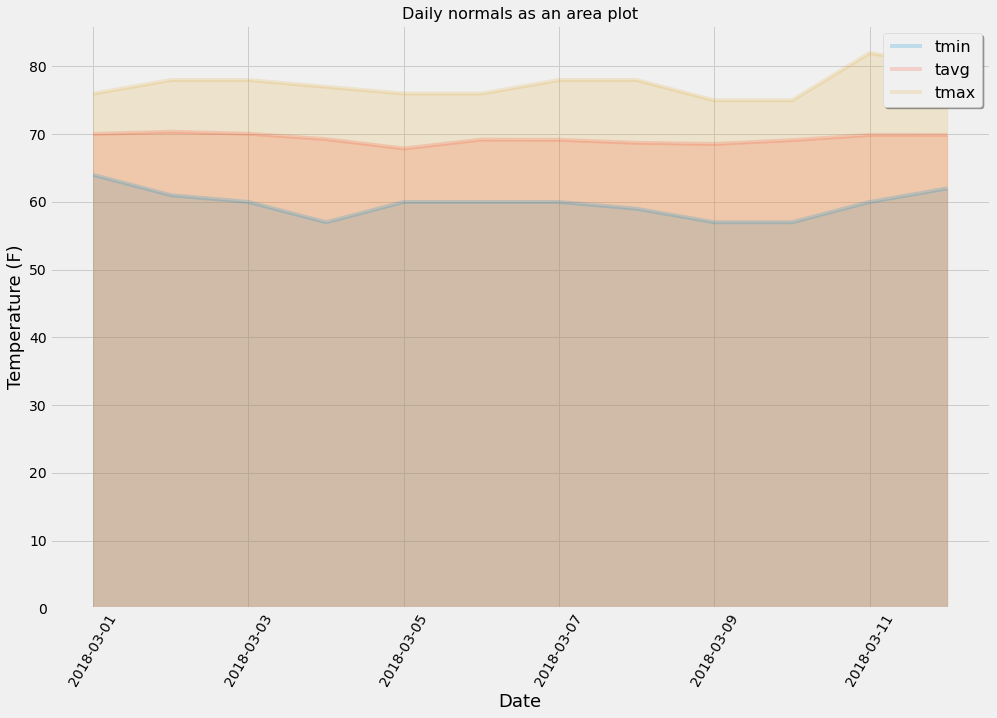

In [40]:
# Plot the daily normals as an area plot with `stacked=False`
#plt.figure(figsize=(9,9))

# Provide legend name

trip_df.plot.area(stacked=False, alpha=.2, figsize=(15,10), rot = 60)

column_name = ["tmin","tavg","tmax"]
legend = plt.legend(column_name, loc="upper right", shadow=True, fontsize=16,  fancybox=True)

plt.grid(True)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Temperature (F)", fontsize = 18)
plt.title("Daily normals as an area plot", fontsize = 16)


# Save figure file
plt.savefig("Images/DailyNormalsAreaPlot.png", bbox_inches='tight')
plt.show()
